This is a tutorial for our figure generator. We show how to create a figure based on grid modules. 

Additional examples can be found in the `tests/` folder.

The following code lines are only needed to show the figure result in jupyter. For that we have one additional dependency: pdf2image ([which requires poppler](https://pypi.org/project/pdf2image/)).

In [1]:
from figuregen.util.jupyter import displaypdf, displayhtml, loadhtml

First, we need to import the figure generator.
"util" provides functionality for cropping, tonemapping, error metrics, etc.

In [2]:
import figuregen
from figuregen.util import image
import numpy as np

Then, we need some image data. Here we use solid color images. Typically, the user has their own image data, that they can load and process. 

In [3]:
# define some colors (r,g,b)
yellow=[232, 181, 88]
l_blue=[94, 163, 188]
blue=[82, 110, 186]
orange=[186, 98, 82]

# generate test images
img_blue = np.tile([x / 255 for x in l_blue], (32, 64, 1))
img_yellow = np.tile([x / 255 for x in yellow], (32, 64, 1))
img_orange = np.tile([x / 255 for x in orange], (32, 64, 1))

# load images
images = [
    figuregen.PNG(img_blue),
    figuregen.PNG(img_yellow),
    figuregen.PNG(img_orange)
]

In the following we create a grid with two rows and three columns and fill it with the images.

In [4]:
n_rows = 2
n_cols = 3
c_grid = figuregen.Grid(num_rows=n_rows, num_cols=n_cols)

# fill grid with image data
for row in range(n_rows):
    for col in range(n_cols):
        c_grid.get_element(row,col).set_image(images[row])

This is the first module for our figure.
To generate a figure the user provides a list of modules (here one grid), the figure width, and the output filename. The filename extension defines which backend will be used. The figure generator offers three backends: LaTeX (.pdf), HTML (.html) and PPTX (.pptx). In this tutorial we use LaTeX (slowest to generate).

Note: If you want to experiment yourself, we recommend HTML as it is the fastest to generate. Use `displayhtml('figure.html')` instead of `displaypdf('figure.pdf')`.

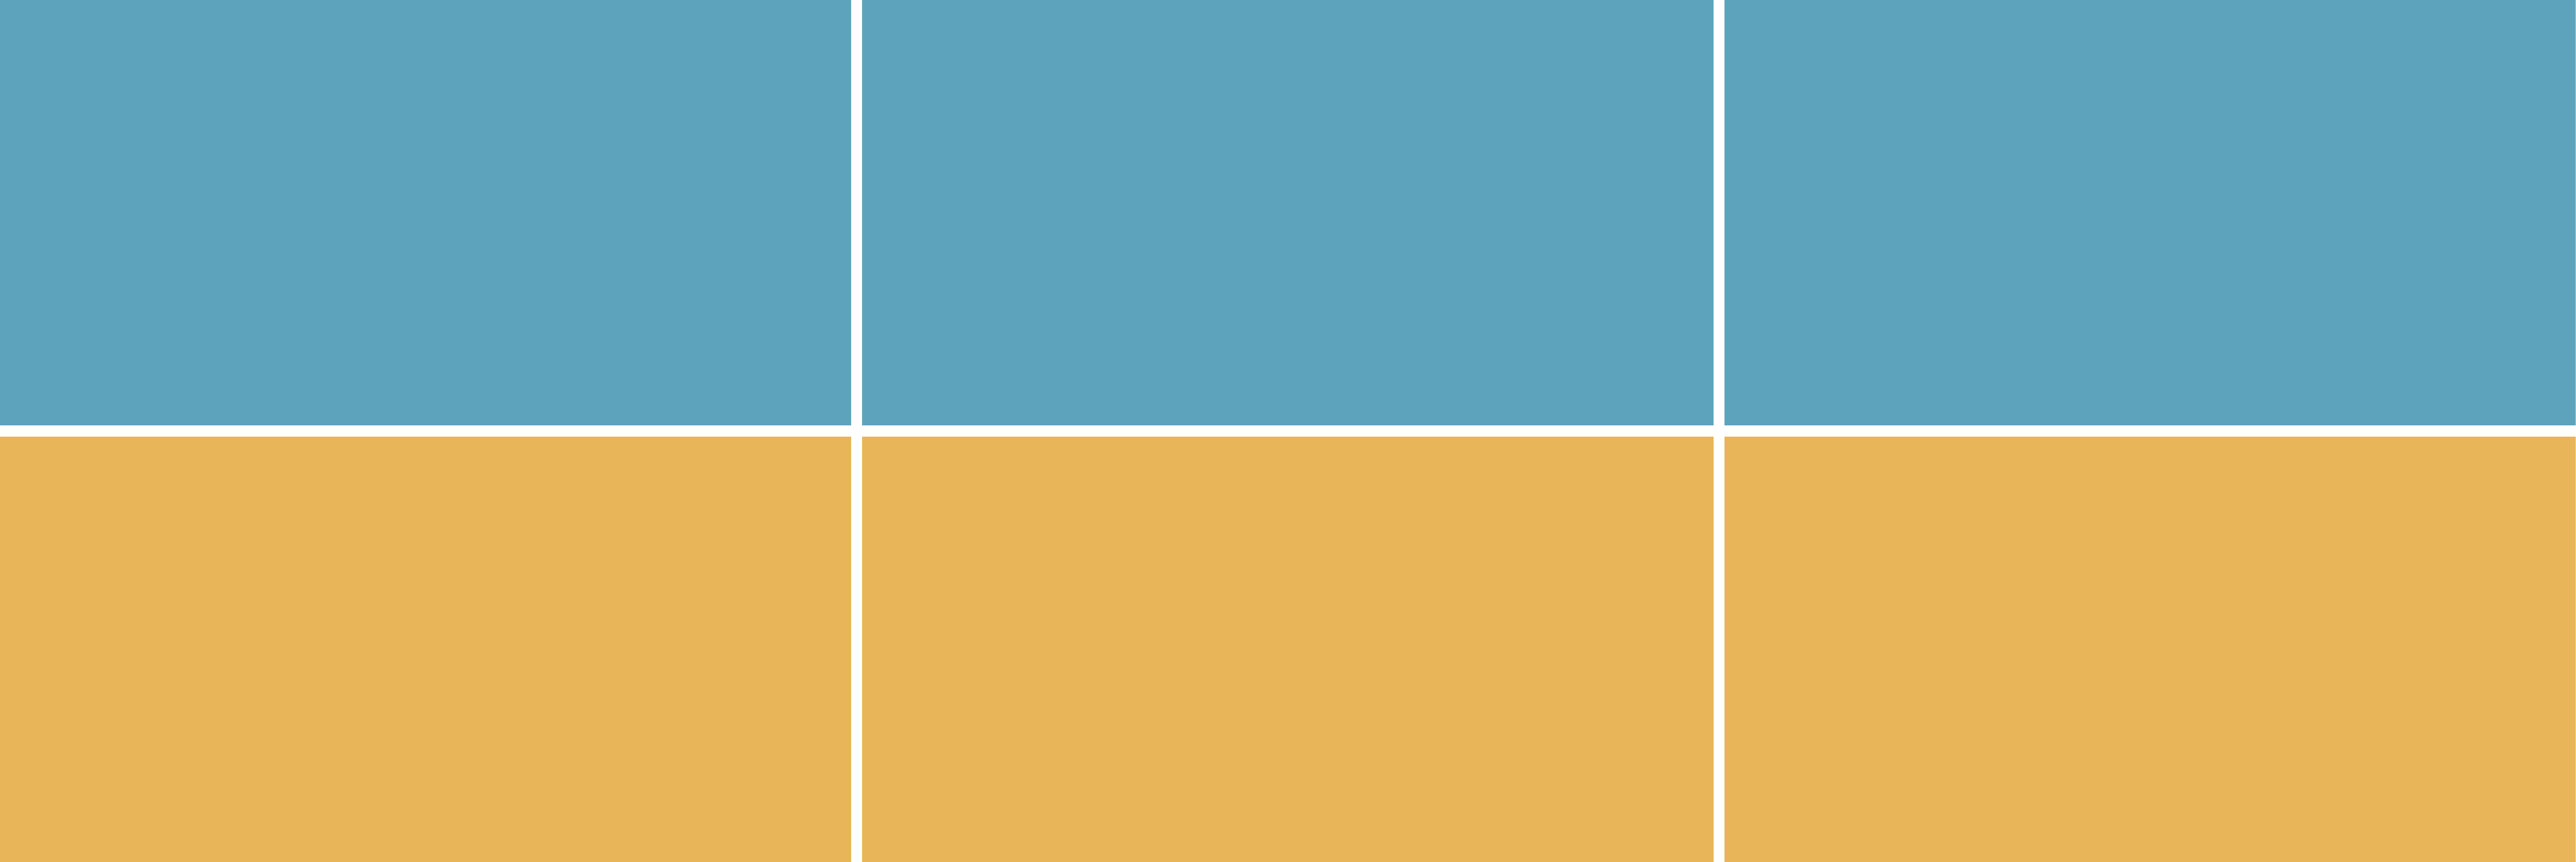

In [5]:
# generate figure
figuregen.horizontal_figure([c_grid], width_cm=18., filename='figure.pdf')
# show figure
displaypdf('figure.pdf')

Let's add another grid to the previous one!

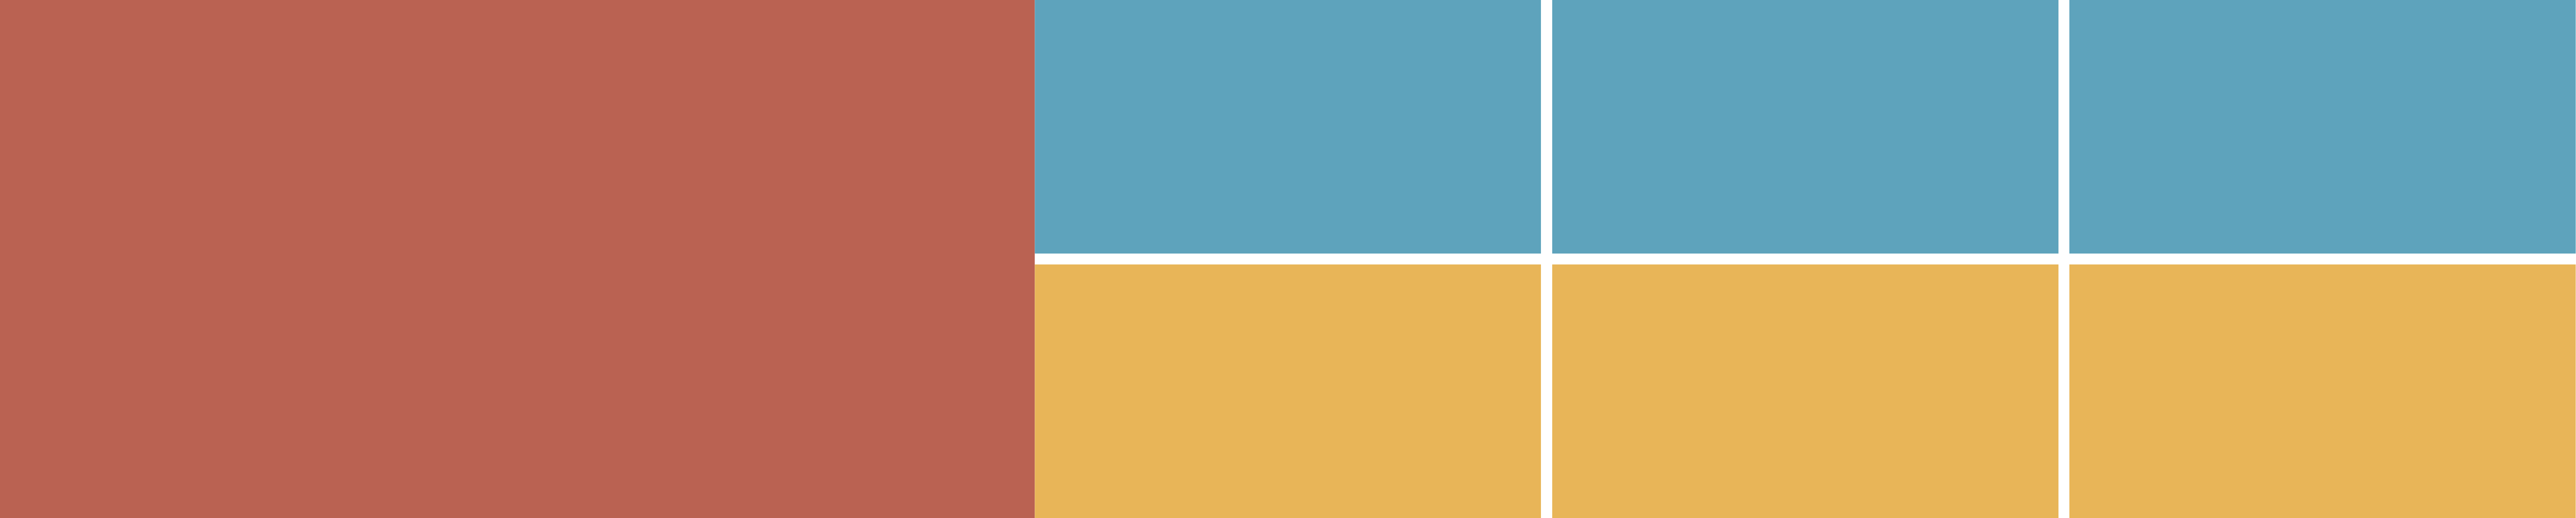

In [6]:
# create a second grid (1-by-1)
ref_grid = figuregen.Grid(num_rows=1, num_cols=1)
ref_img = figuregen.PNG(img_orange)
ref_e = ref_grid.get_element(0,0).set_image(ref_img)

# generate figure with two grids
figuregen.horizontal_figure([ref_grid, c_grid], width_cm=18., filename='figure.pdf')
displaypdf('figure.pdf')

Let's add some paddings!

Layout: 
To make sure, that the user does not need to set every little layout-property there exist, we provide a default layout ('figuregenerator/generator/default_layouts.py'). Every value not set, will get the default value within that file. Default values for field_sizes concerning titles/captions are defined in 'figuregenerator/generator/figuregen.py'.

Units:
Most units are in mm (millimeter, type:float). Some are in points (concerning linewidths and fontsizes) or pixels (concerning images, e.g crops and markers).

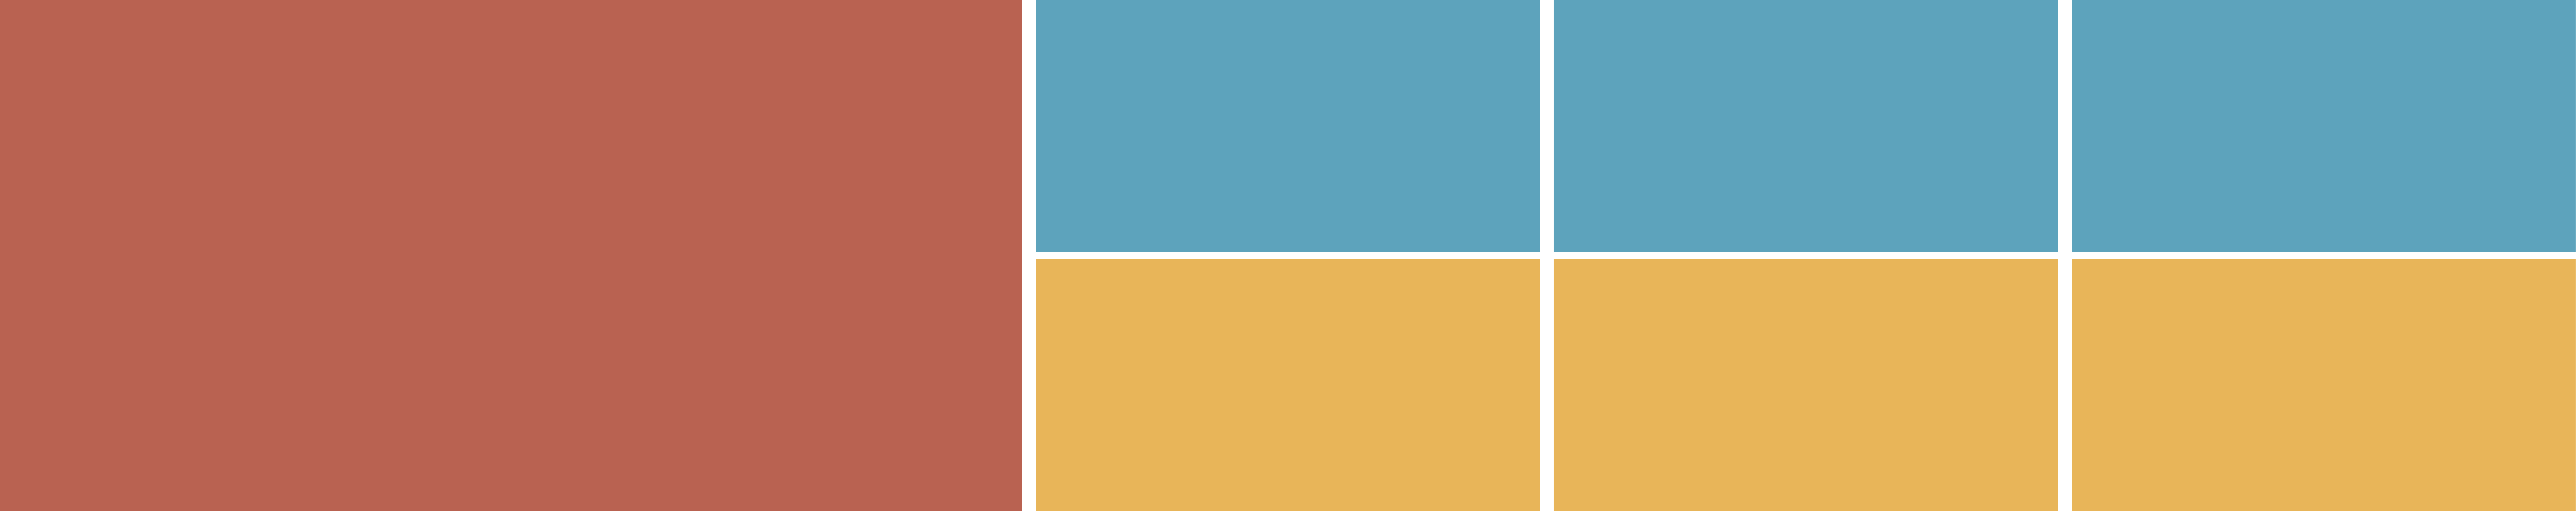

In [7]:

# Specify the paddings for rows and columns (unit: mm), before we had default values
c_lay = c_grid.get_layout()
c_lay.set_padding(row=0.5, column=1.0)

# To get a padding between those grids: set padding right for the left grid
ref_lay = ref_grid.get_layout()
ref_lay.set_padding(right=1.0)

# generate figure
figuregen.horizontal_figure([ref_grid, c_grid], width_cm=18., filename='figure.pdf')
displaypdf("figure.pdf")

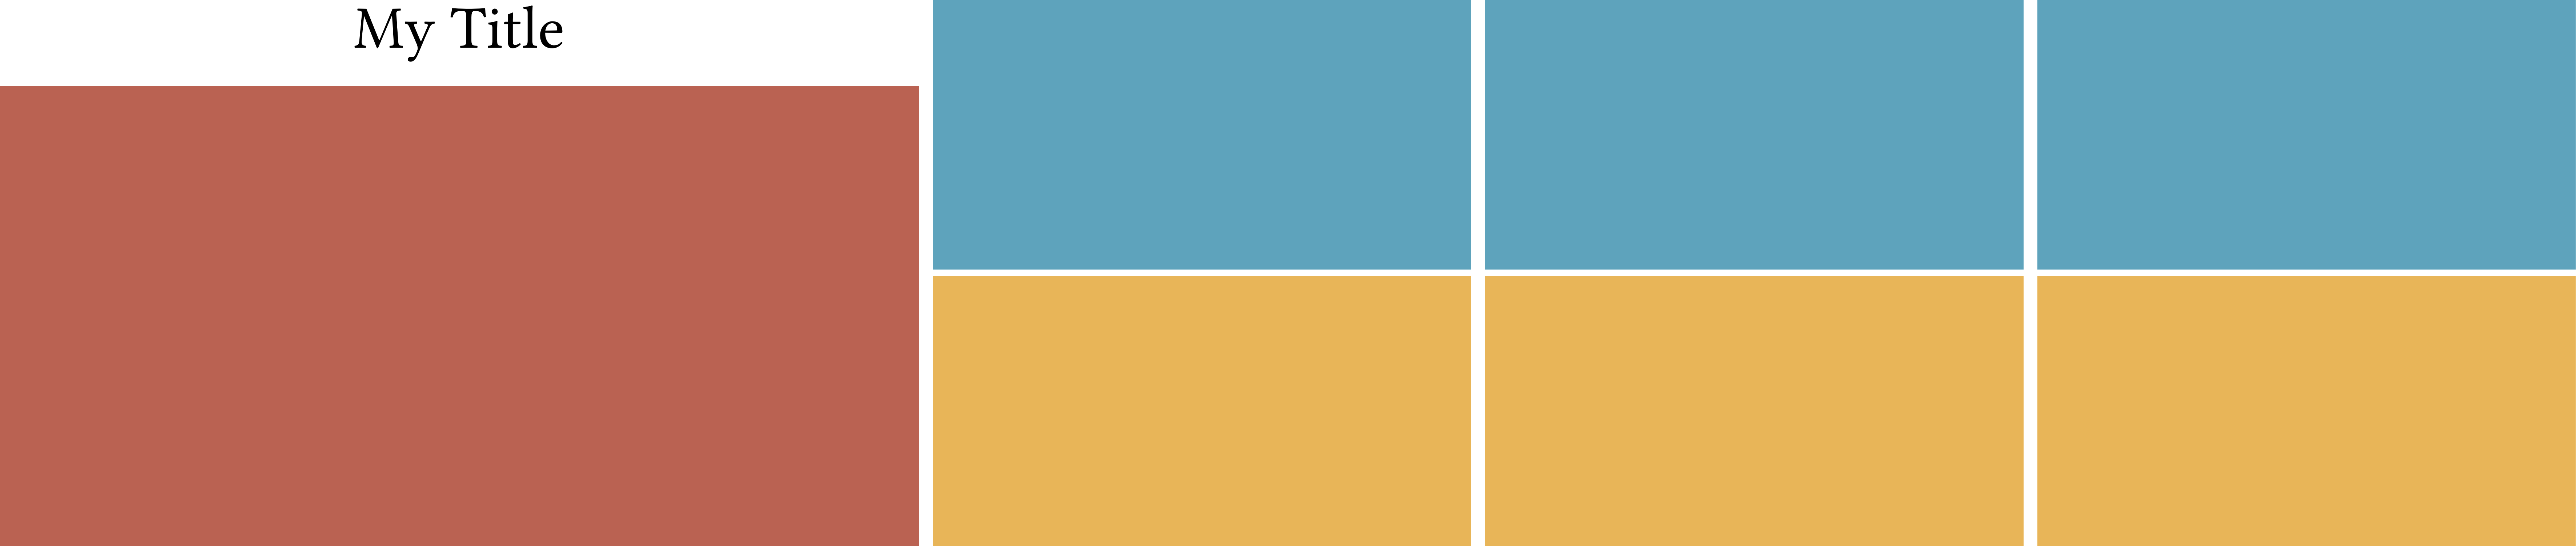

In [8]:
# add a title on top of the reference
ref_grid.set_title('top', 'My Title')
# Specify field_size of the title. 'field_size' is either height oder width, depending on the position (in case for 'top' it is the height).
ref_lay.set_title('top', field_size_mm=5., offset_mm=1., fontsize=12)

# generate figure with two grids
figuregen.horizontal_figure([ref_grid, c_grid], width_cm=18., filename='figure.pdf')
displaypdf("figure.pdf")


Let's align the top edge of the right hand images with the left hand one.

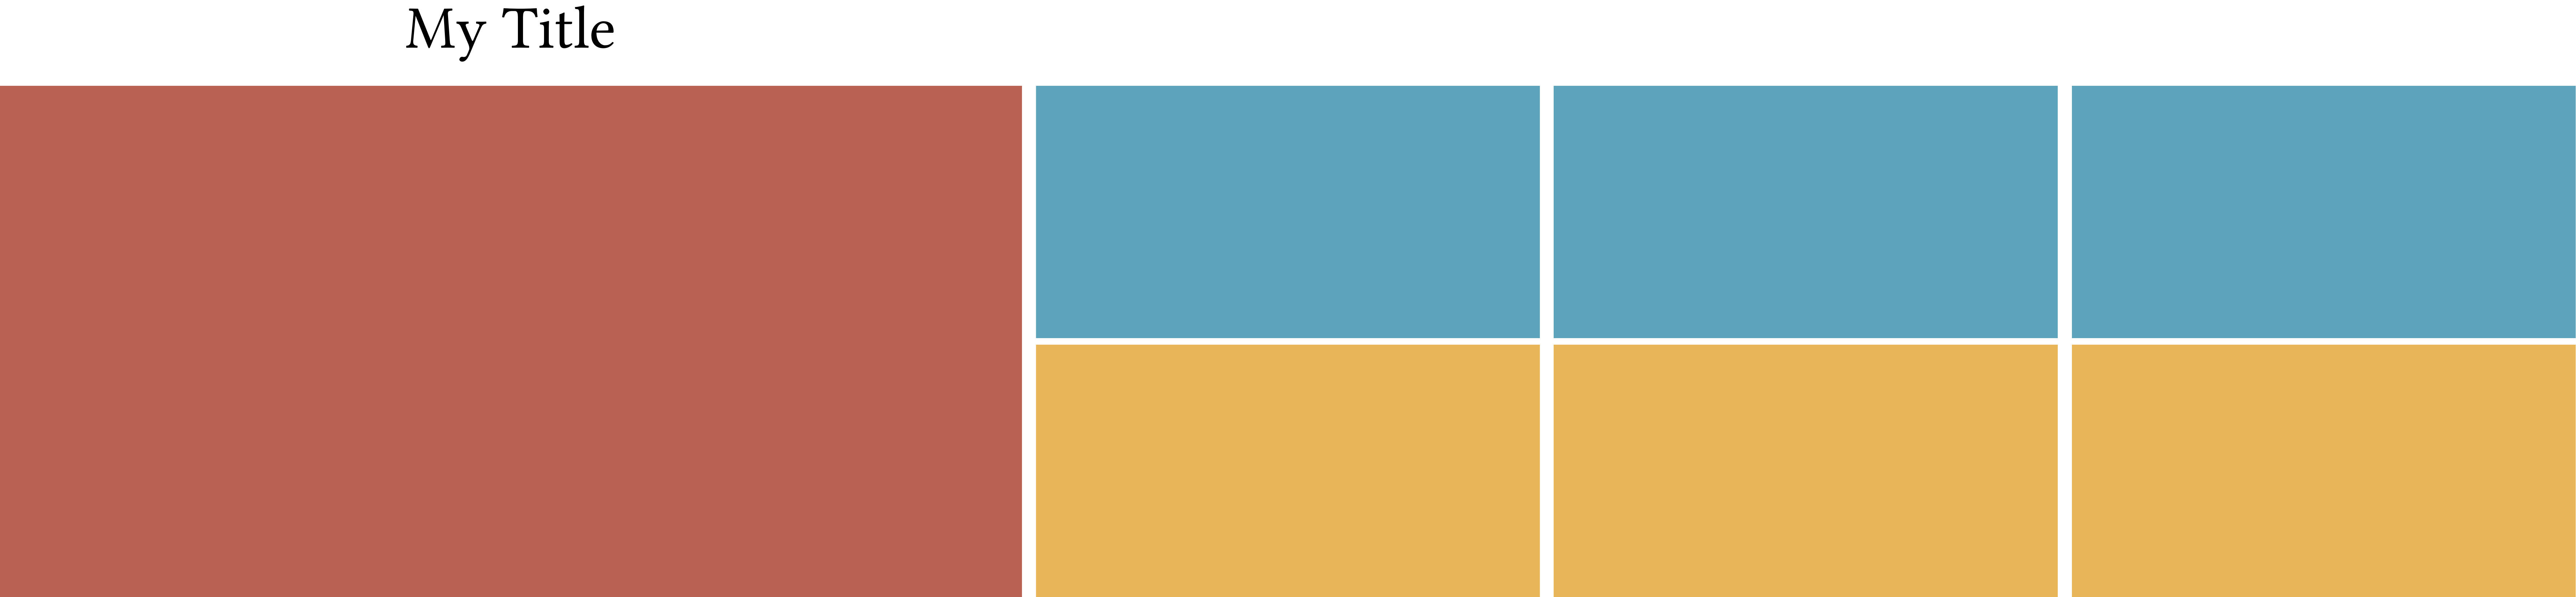

In [9]:
c_lay.set_padding(top=6.) # = field_size (5.0) + offset (1.0) of reference title

# generate figure
figuregen.horizontal_figure([ref_grid, c_grid], width_cm=18., filename='figure.pdf')
displaypdf("figure.pdf")

Labels can be placed on top of images. Each image has 6 label positions: "top_left", "top_center", "top_right", "bottom_left", etc. 

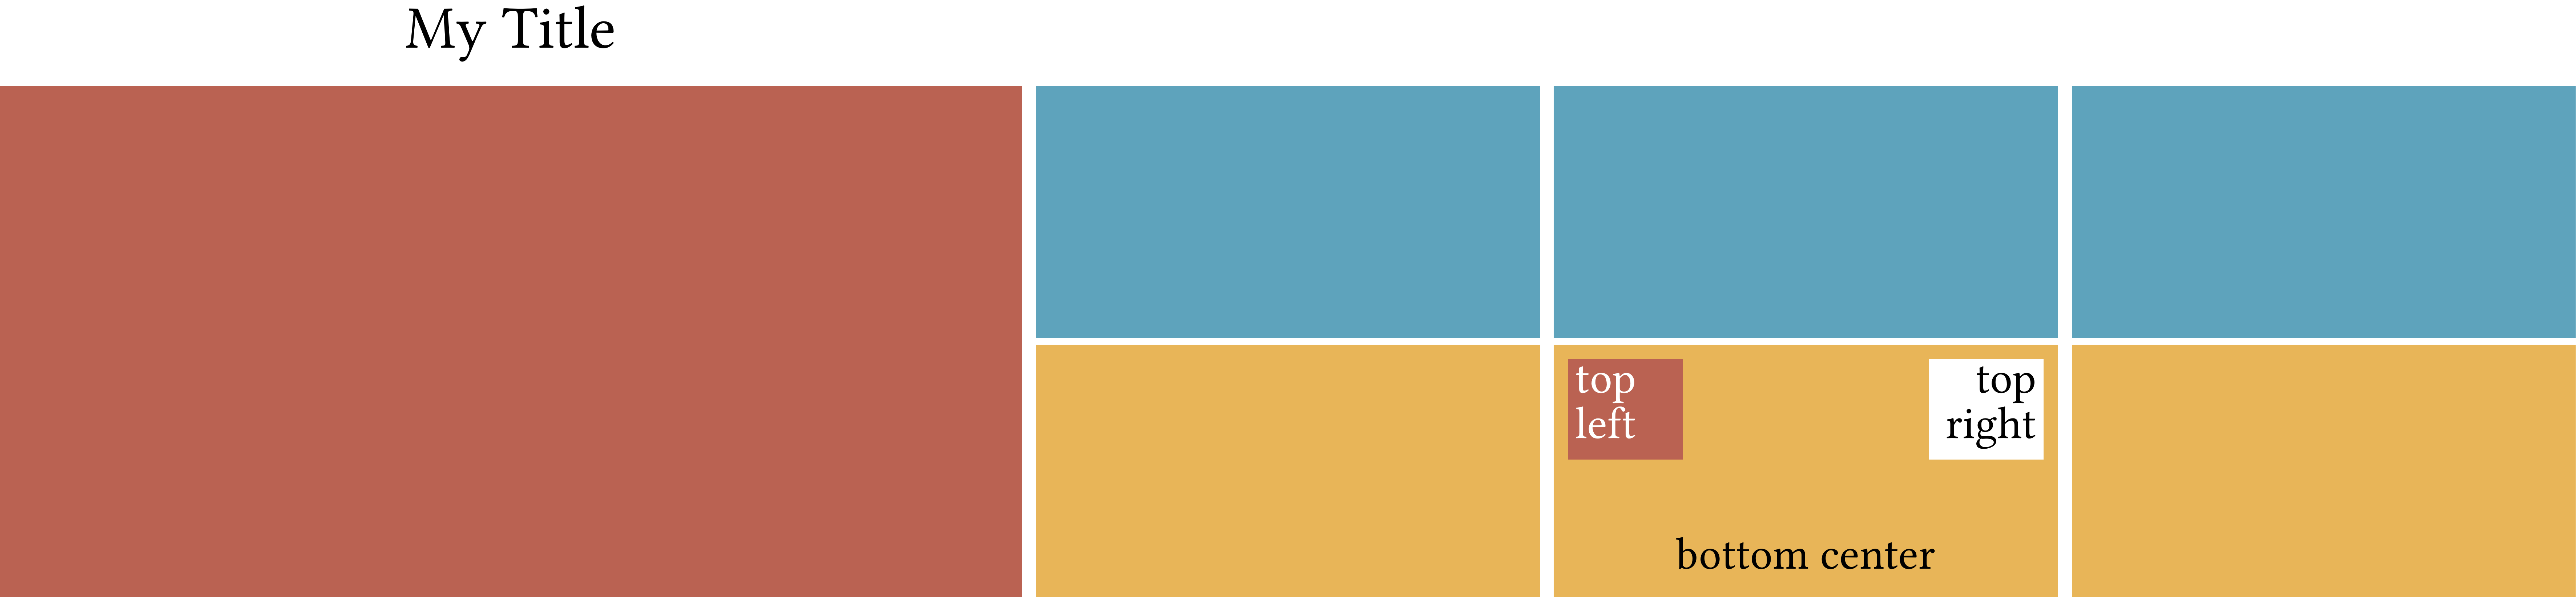

In [10]:
# labels (examples, each element can have in total 6 labels on each valid position)
e1 = c_grid.get_element(1,1)
e1.set_label("bottom center", pos='bottom_center', width_mm=25., height_mm=4.0, offset_mm=[1.0, 1.0], 
                  fontsize=9, bg_color=None)
e1.set_label("top\\\\right", pos='top_right', width_mm=8., height_mm=7.0, offset_mm=[1.0, 1.0], 
                  fontsize=9, bg_color=[255,255,255])
e1.set_label(r"top\\left", pos='top_left', width_mm=8., height_mm=7.0, offset_mm=[1.0, 1.0], 
                  fontsize=9, bg_color=orange, txt_color=[255,255,255])

# generate figure
figuregen.horizontal_figure([ref_grid, c_grid], width_cm=18., filename='figure.pdf')
displaypdf("figure.pdf")

There are several types of titles for a grid, which are all optional:
- titles, 
- row and column titles (similar to normal titles, can be defined by providing a list of strings),
- captions (titles below each image), and 
- labels (placed on top of an image).

If you are interested, we recommend the `tests/single_grid.py`, which covers all types of titles.

Now, we will show you how you can put modules on top of each other (vertical stack). Here, we need to use `figuregen.figure` instead of `figuregen.horizontal_figure`.


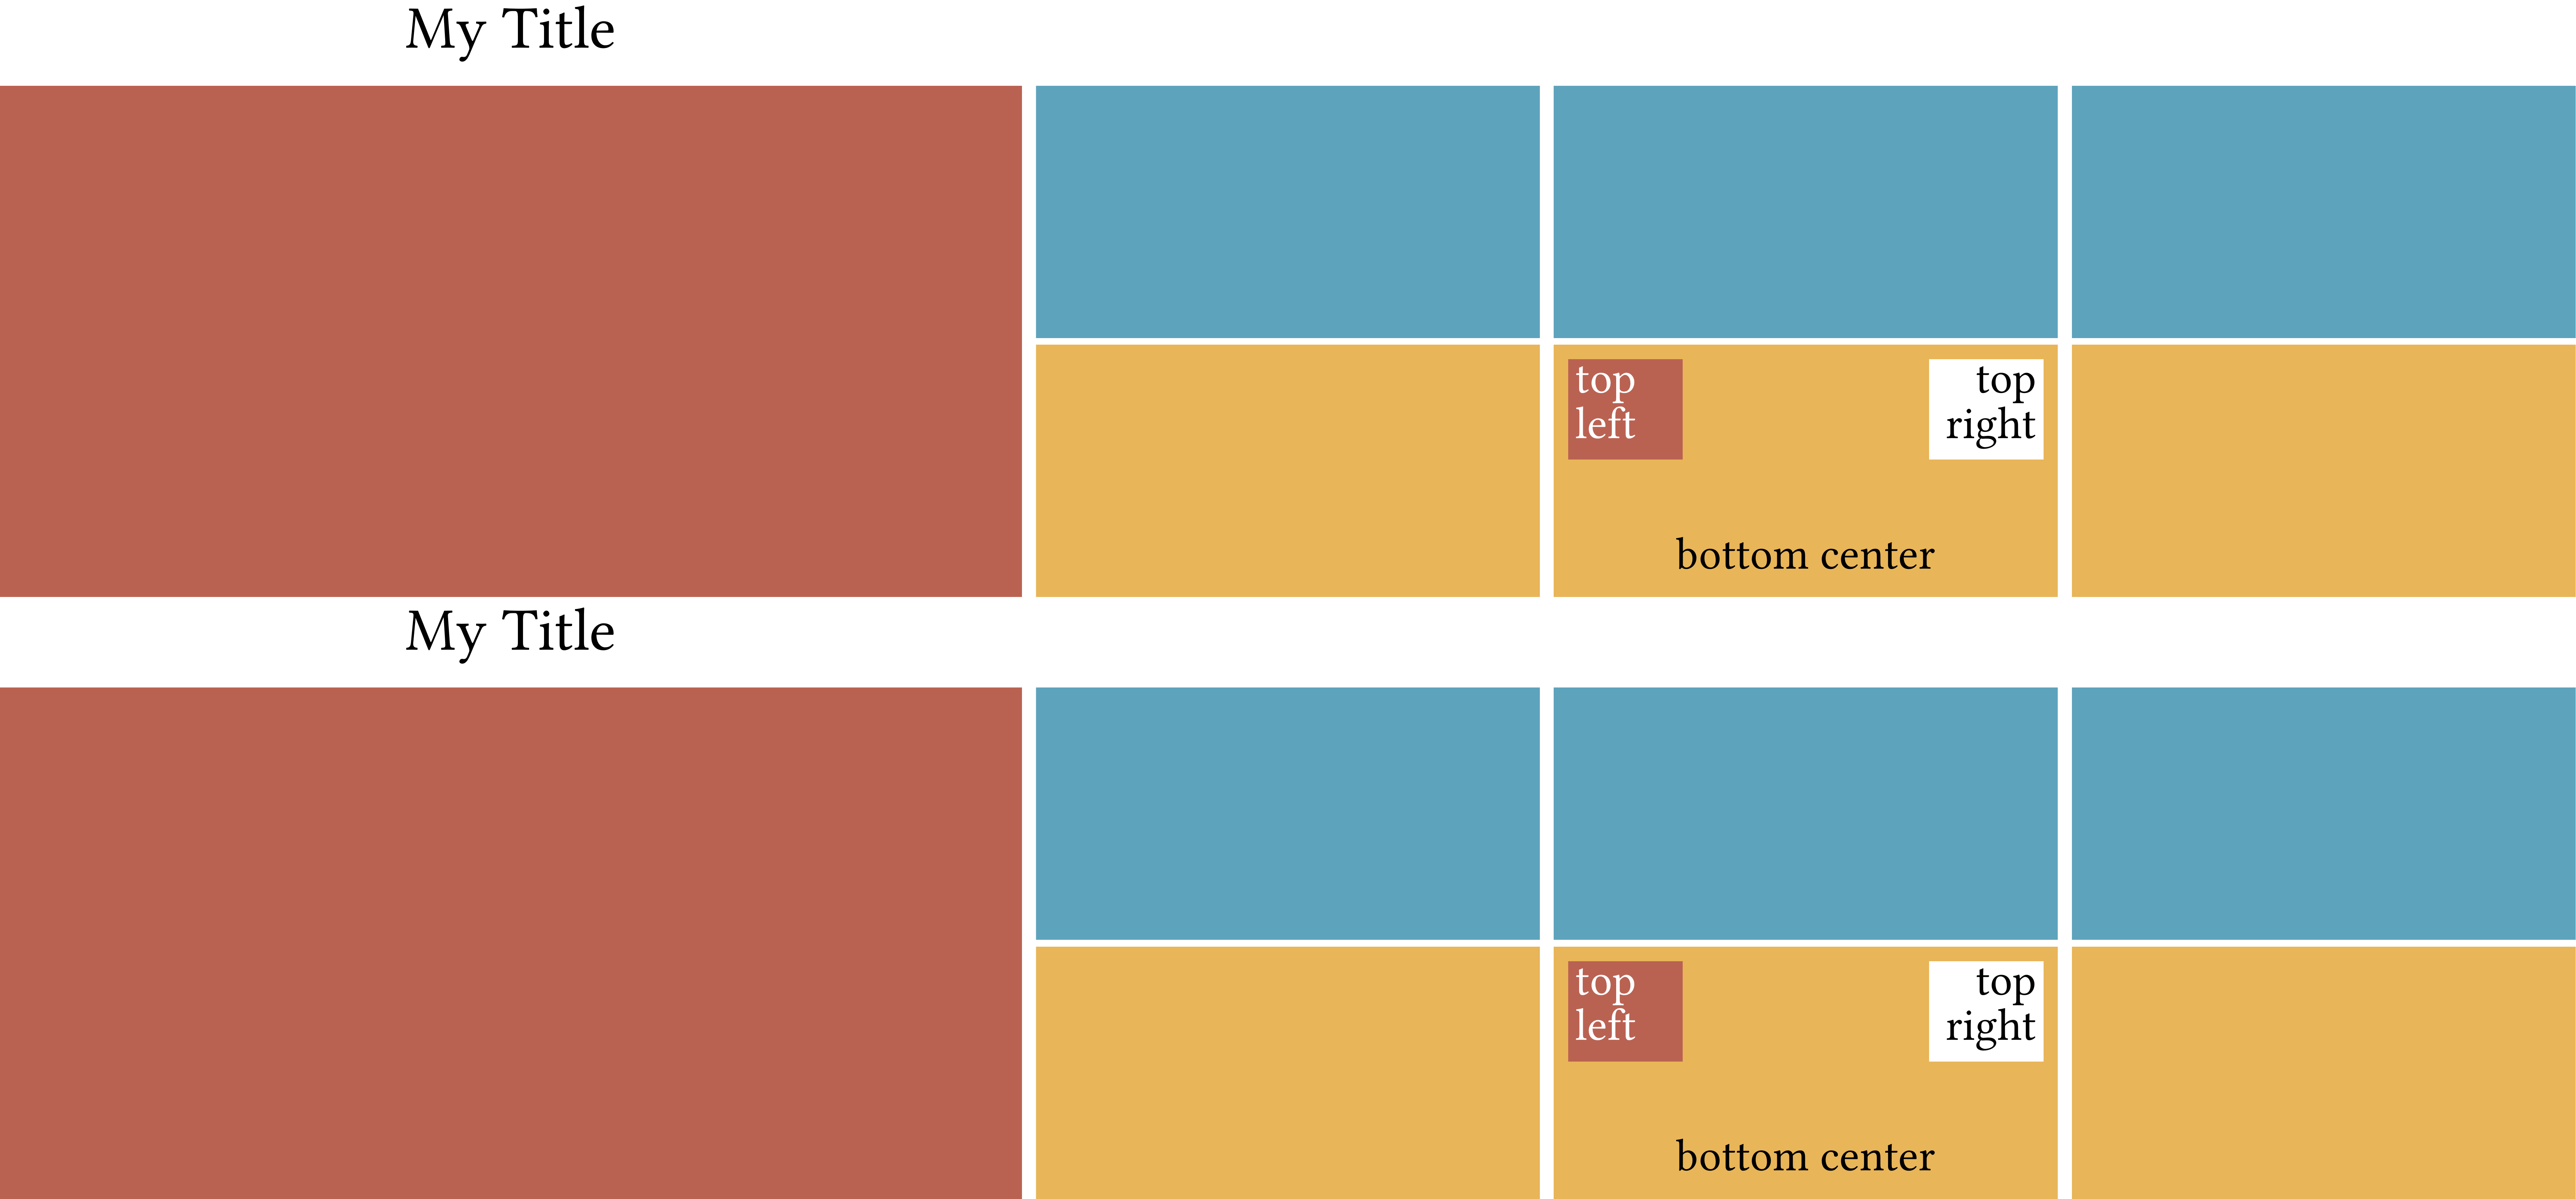

In [11]:
v_stacked = [
    [ref_grid, c_grid],
    [ref_grid, c_grid]
]

# create figure 
figuregen.figure(v_stacked, width_cm=18., filename='figure.pdf')
displaypdf("figure.pdf")

In the LaTeX-backend you can also change fonts and import other packages you need. Here, we overwrite the font-packages.

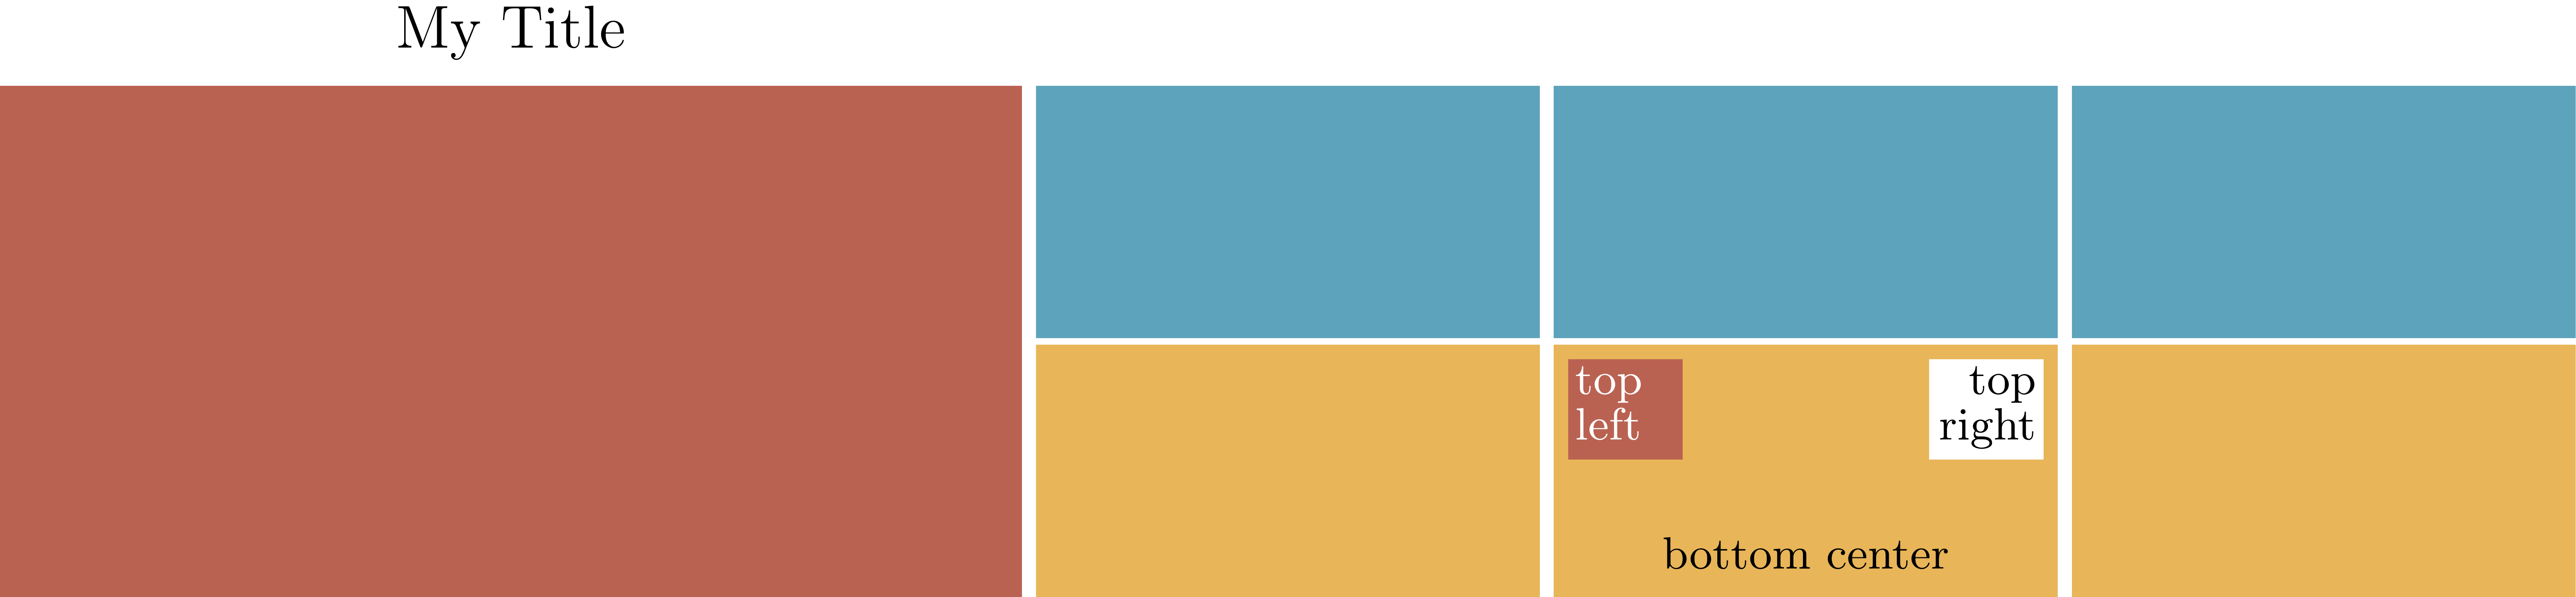

In [12]:
# create figure 
figuregen.horizontal_figure([ref_grid, c_grid], width_cm=18., filename='figure.pdf', tex_packages=['[T1]{fontenc}', '{arial}'])
displaypdf("figure.pdf")